# 📊 Exploratory Data Analysis (EDA) Assignment
## Housing Prices Dataset

## List of variables
- **ad_description**: A description of the house. (String)
- **ad_last_update**: The date of the last update to the listing. (String)
- **air_conditioner**: An indicator of whether or not the house has air conditioning. (Boolean)
- **balcony**: An indicator of whether or not the house has a balcony. (Boolean)
- **bath_num**: The number of bathrooms in the house. (Integer)
- **built_in_wardrobe**: An indicator of whether or not the house has a built in wardrobe. (Boolean)
- **chimney**: An indicator of whether or not the house has a chimney. (Boolean)
- **construct_date**: The date the house was constructed. (String)
- **energetic_certif**: The energetic certification of the house. (String)
- **floor**: The floor on which the house is located. (Integer)
- **garage**: An indicator of whether or not the house has a garage. (Boolean)
- **garden**: An indicator of whether or not the house has a garden. (Boolean)
- **ground_size**: The size of the house in square meters. (Integer)
- **heating**: The type of heating in the house. (String)
- **house_type**: The type of house. (String)
- **kitchen**: An indicator of whether or not the house has a kitchen. (Boolean)
- **lift**: An indicator of whether or not the house has a lift. (Boolean)
- **loc_city**: The city in which the house is located. (String)
- **loc_district**: The district in which the house is located. (String)
- **loc_full**: The full address of the house. (String)
- **loc_neigh**: The neighborhood in which the house is located. (String)
- **loc_street**: The street on which the house is located. (String)
- **loc_zone**: The zone in which the house is located. (String)
- **m2_real**: The real size of square meters. (Integer)
- **m2_useful**: The size of the house in square meters. (Integer)
- **orientation**: The orientation of the house. (String)
- **price**: The price of the house. (Integer)
- **reduced_mobility**: An indicator of whether or not the house is suitable for reduced mobility. (Boolean)
- **room_num**: The number of rooms in the house. (Integer)
- **storage_room**: An indicator of whether or not the house has a storage room. (Boolean)
- **swimming_pool**: An indicator of whether or not the house has a swimming pool. (Boolean)
- **terrace**: An indicator of whether or not the house has a terrace. (Boolean)

## 1. Data loading and overview
- Load the dataset
- Display the first rows
- Report:
  - Number of rows and columns
  - Column names
  - Data types

In [1]:

import pandas as pd;
df = pd.read_csv("houses_coruna.csv")
df.head()

,ad_description,ad_last_update,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,condition,construct_date,energetic_certif,...,m2_useful,obtention_date,orientation,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,unfurnished
0,OPORTUNIDAD! REF. 20 EFIGEST INMOBILIARIA VEND...,Anuncio actualizado el 10 de abril,0,0,2,0,0,segunda mano/para reformar,1970,en trámite,...,NaN,2019-04-13,NaN,79500,0,5,0,0,0,NaN
1,NaN,más de 5 meses sin actualizar,0,0,1,0,0,segunda mano/buen estado,NaN,no indicado,...,57,2019-04-13,NaN,80000,0,2,1,0,0,NaN
2,Dispone de un gran terreno.,más de 5 meses sin actualizar,0,0,1,0,0,segunda mano/para reformar,NaN,no indicado,...,NaN,2019-04-13,NaN,30000,0,2,0,0,0,NaN
3,Casa con bajo. garaje. atico. vivienda. se pue...,más de 5 meses sin actualizar,0,0,2,0,0,segunda mano/buen estado,NaN,no indicado,...,NaN,2019-04-13,NaN,235000,0,3,0,0,1,NaN
4,NaN,más de 5 meses sin actualizar,0,0,1,0,0,segunda mano/buen estado,NaN,no indicado,...,NaN,2019-04-13,NaN,75000,0,2,0,0,0,NaN


In [2]:

rows, cols = df.shape
print(f"Rows: {rows}")
print(f"Columns: {cols}")

print("Column names:")
print(df.columns.tolist())


print("Data types:")
print(df.dtypes)


Rows: 8341
Columns: 36
Column names:
['ad_description', 'ad_last_update', 'air_conditioner', 'balcony', 'bath_num', 'built_in_wardrobe', 'chimney', 'condition', 'construct_date', 'energetic_certif', 'floor', 'garage', 'garden', 'ground_size', 'heating', 'house_id', 'house_type', 'kitchen', 'lift', 'loc_city', 'loc_district', 'loc_full', 'loc_neigh', 'loc_street', 'loc_zone', 'm2_real', 'm2_useful', 'obtention_date', 'orientation', 'price', 'reduced_mobility', 'room_num', 'storage_room', 'swimming_pool', 'terrace', 'unfurnished']
Data types:
ad_description       object
ad_last_update       object
air_conditioner      object
balcony              object
bath_num             object
built_in_wardrobe    object
chimney              object
condition            object
construct_date       object
energetic_certif     object
floor                object
garage               object
garden               object
ground_size          object
heating              object
house_id             object
house

## 2. Data quality analysis
Analyze the quality of the dataset:
- Duplicates:
  - Check for duplicated rows
- Missing values:
  - Identify which columns contain missing data
  - Quantify missing values
- Data consistency:
  - Identify any suspicious or extreme values

Explain any issues you detect.

- Duplicates:
  - Check for duplicated rows

In [3]:

duplicated_rows = df.duplicated().sum()
duplicated_rows


np.int64(29)

- Missing values:
  - Identify which columns contain missing data
  

In [4]:
missing_per_column = df.isnull().sum()
missing_per_column[missing_per_column > 0]



ad_description       550
condition            677
construct_date      5398
energetic_certif    2128
floor               1667
garage              3366
ground_size         8311
heating             6326
kitchen             8311
lift                4197
loc_district        1203
loc_neigh           5726
loc_street          8017
m2_useful           4386
orientation         5766
unfurnished         8311
dtype: int64

- Quantify missing values

In [5]:
missing_percentage = (df.isnull().mean() * 100).round(2)

missing_summary = pd.DataFrame({
    "Missing values": missing_per_column,
    "Missing (%)": missing_percentage
})

missing_summary[missing_summary["Missing values"] > 0]


,Missing values,Missing (%)
ad_description,550,6.59
condition,677,8.12
construct_date,5398,64.72
energetic_certif,2128,25.51
floor,1667,19.99
garage,3366,40.35
ground_size,8311,99.64
heating,6326,75.84
kitchen,8311,99.64
lift,4197,50.32


- Data consistency:
  - Identify any suspicious or extreme values

In [6]:
df.describe()
 

,ad_description,ad_last_update,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,condition,construct_date,energetic_certif,...,m2_useful,obtention_date,orientation,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,unfurnished
count,7791,8341,8341,8341,8341,8341,8341,7664,2943,6213,...,3955,8341,2575,8341,8341,8341,8341,8341,8341,30
unique,7386,326,3,3,15,3,3,4,105,4,...,350,3,16,1027,3,19,3,3,3,1
top,ad_description,Anuncio actualizado el 10 de abril,0,0,2,1,0,segunda mano/buen estado,2008,en trámite,...,90,2019-04-14,sur,120000,0,3,1,0,0,unfurnished
freq,30,472,8170,7415,3770,4229,8084,6273,190,3426,...,146,8162,941,217,7522,2572,4851,7321,5605,30


In [7]:
numeric_cols = df.select_dtypes(include="number")

Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numeric_cols < (Q1 - 1.5 * IQR)) | 
            (numeric_cols > (Q3 + 1.5 * IQR)))

outliers.sum()


Series([], dtype: float64)

In [8]:
categorical_cols = df.select_dtypes(include="object")

for col in categorical_cols:
    print(f"\n{col}")
    print(df[col].value_counts(dropna=False))



ad_description
ad_description
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

Explain any issues you detect.

El conjunto de datos presenta registros inconsistentes debidos a errores de importación, así como una alta presencia de valores faltantes en varias variables. Además, existen inconsistencias en el formato de los datos, mezcla de texto y números, y valores extremos poco realistas. Por ello, es necesario realizar una limpieza previa del dataset antes del análisis.

## 3.Descriptive statistics

- Compute summary statistics for numeric variables
- Interpret:
  - Central tendency
  - Dispersion
  - Range
- Identify variables with skewed distributions

In [9]:
df.columns

Index(['ad_description', 'ad_last_update', 'air_conditioner', 'balcony',
       'bath_num', 'built_in_wardrobe', 'chimney', 'condition',
       'construct_date', 'energetic_certif', 'floor', 'garage', 'garden',
       'ground_size', 'heating', 'house_id', 'house_type', 'kitchen', 'lift',
       'loc_city', 'loc_district', 'loc_full', 'loc_neigh', 'loc_street',
       'loc_zone', 'm2_real', 'm2_useful', 'obtention_date', 'orientation',
       'price', 'reduced_mobility', 'room_num', 'storage_room',
       'swimming_pool', 'terrace', 'unfurnished'],
      dtype='object')

Se seleccionaron las variables price, m2_real, m2_useful, bath_num y room_num por tratarse de variables cuantitativas que representan medidas reales del inmueble, siendo adecuadas para el cálculo de estadísticas descriptivas como media, dispersión y rango.

In [ ]:
df["price"].head()

In [14]:
cols = ["price", "m2_real", "m2_useful", "bath_num", "room_num"]

numeric_df = df[cols].apply(pd.to_numeric, errors="coerce")

numeric_df.describe()


,price,m2_real,m2_useful,bath_num,room_num
count,8.311000e+03,8311.000000,3925.000000,8211.000000,8183.000000
mean,1.831138e+05,1044.766093,144.594140,2.053952,3.315654
std,1.900855e+05,8162.553553,115.410326,1.079715,1.529537
min,9.995000e+03,2.000000,1.000000,1.000000,1.000000
25%,8.400000e+04,80.000000,70.000000,1.000000,2.000000
50%,1.280000e+05,114.000000,95.000000,2.000000,3.000000
75%,2.300000e+05,600.000000,190.000000,2.000000,4.000000
max,3.800000e+06,400000.000000,1100.000000,30.000000,30.000000


In [15]:
numeric_df.skew()

price         6.470370
m2_real      36.903635
m2_useful     2.278236
bath_num      3.788452
room_num      2.022880
dtype: float64

La media y la mediana muestran el valor típico de los datos; la alta dispersión indica mucha variabilidad entre los valores; y el amplio rango confirma la presencia de valores extremos.

## 4. Univariate analysis
Analyze individual variables:
- Choose at least three numeric variables
- Visualize their distributions using appropriate plots
- Comment on:
  - Shape of the distribution
  - Presence of outliers
  - Variability

conda install matplotlib


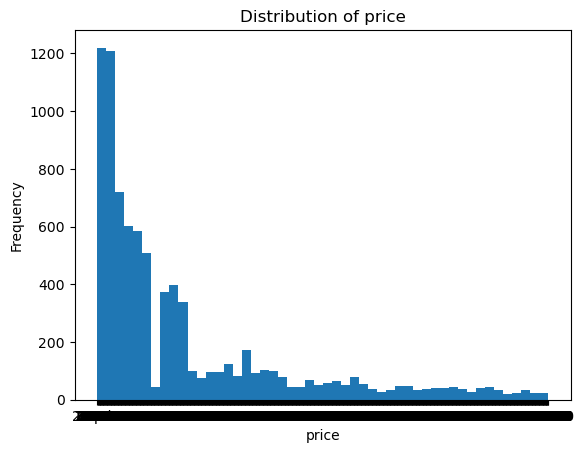

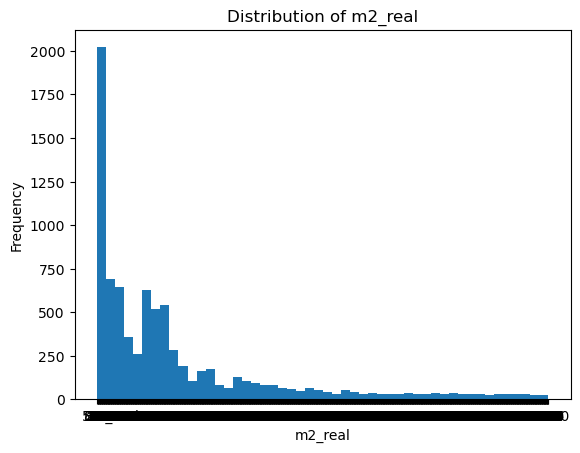

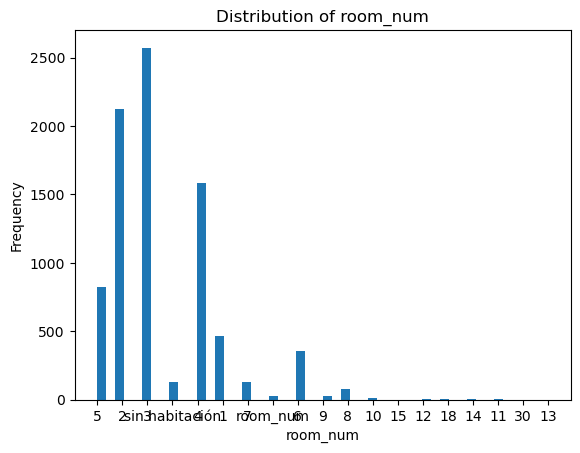

In [16]:
import matplotlib.pyplot as plt

variables = ["price", "m2_real", "room_num"]

for var in variables:
    plt.figure()
    plt.hist(df[var].dropna(), bins=50)
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()


## 5. Bivariate and multivariate analysis
Study relationships between pairs of variables:

- **a) Numeric vs numeric**
    - Choose at least two pairs
    - Use scatter plots
    - Comment on:
        - Direction
        - Strength
- **b) Numeric vs categorical**
    - Compare the numeric variable across categories
    - Use appropriate plots
    - Interpret differences between groups
- **c) Multivariate analysis**
    - Combine more than two variables to extract insights.

## 6. Correlation analysis
Compute correlation values between numeric variables

Identify:
- Strong positive correlations
- Strong negative correlations
- Weak or null correlations

 Relate correlations to earlier visual findings

## 7. Conclusions

Summarize your main findings:
- Key characteristics of the housing market
- Important relationships between variables
- Limitations of the dataset
- Ideas for further analysis or modeling